# Assignment 2 Playing Moneyball

This assignment is based on a story of Moneyball, a book by Michael Lewis in 2003 and a movie in 2011 starring Brad Pitt. Moneyball discusses how sports analytics changed baseball. 

In [1]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

**Q1.** Read data from `baseball.csv` and store the data in a data frame named `df`. 

In [2]:
import pandas as pd

# Read the CSV file and assign it to df
df = pd.read_csv('baseball (3).csv')

# Display the first few rows to check
df.head()



,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


The dataset contains team statistics between 1962 and 2012 such as RS (Runs Scored), RA (Runs Allowed), W (Number of Wins), OBP (On-base Percentage), SLG (Slugging Percentage), BA (Batting Average), G (Number of Games), OOBP (Opponents OBP) and OSLG (Opponents SLG).

Rich teams such as the Yankees and the Red Sox can afford all-star players. But how do poor teams compete? Moneyball tells the story of the Oakland A's.

The A's (standard abbreviation OAK) is a team near San Francisco, California that increased the number of wins continuously from 1997 to 2002 and made the playoffs every year from 2000 to 2003 with a very low payroll. They used an analytical approach to select undervalued players and form an efficient team. 

The following code displays the A's seasonal team statistics between 1997 and 2004. 

In [3]:
df.loc[(df["Team"] == "OAK")&(df["Year"].isin([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004])), 
["Team","Year", "W", "Playoffs", "RS", "RA", "OBP", "SLG", "OOBP", "OSLG"]].sort_values("Year")

,Team,Year,W,Playoffs,RS,RA,OBP,SLG,OOBP,OSLG
469,OAK,1997,65,0,764,946,0.339,0.423,NaN,NaN
440,OAK,1998,74,0,804,866,0.338,0.397,NaN,NaN
410,OAK,1999,87,0,893,846,0.355,0.446,0.344,0.428
380,OAK,2000,91,1,947,813,0.360,0.458,0.348,0.423
350,OAK,2001,102,1,884,645,0.345,0.439,0.308,0.380
320,OAK,2002,103,1,800,654,0.339,0.432,0.315,0.384
290,OAK,2003,96,1,768,643,0.327,0.417,0.314,0.376
260,OAK,2004,91,0,793,742,0.343,0.433,0.332,0.409


## Making It to the Playoffs

The A's approach was to get to the playoffs by using analytics. Assume that a team will make the playoffs by winning at least *95* games in the regular season. We'll use linear regression to predict how many games a team will win using the difference between runs scored and runs allowed. We'll then use linear regression again
to predict the number of runs a team will score
using batting statistics, and the number of
runs a team will allow using fielding and pitching
statistics.

The following code subsets the data to include only years before 2002 and creates a new column called run difference `RD`=`RS`-`RA`, which is the difference between runs scored and runs allowed. 

In [4]:
df_before_2002 = df[df["Year"] < 2002].copy()
df_before_2002["RD"] = df_before_2002["RS"] - df_before_2002["RA"]
df_before_2002

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN,-54
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN,80
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN,188
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN,110


### Predicting Wins

**Q2** Use the number of wins (on the y-axis) and run difference (on the x-axis) data in `df_before_2002` to create a scatter plot.

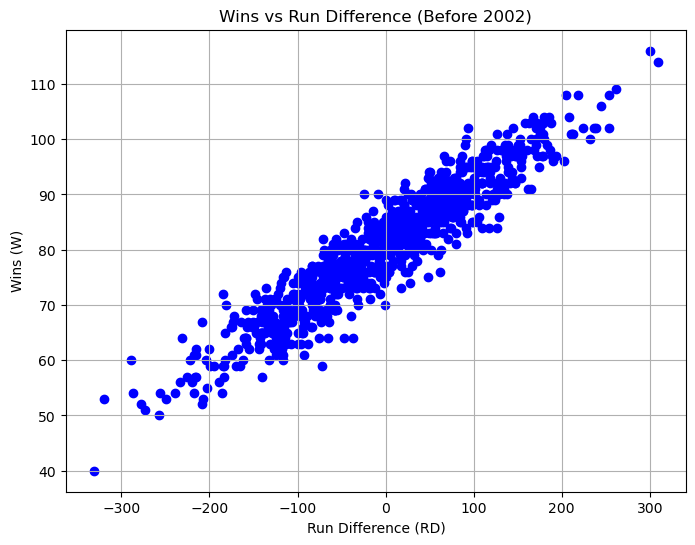

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of Wins vs Run Difference
plt.figure(figsize=(8,6))
plt.scatter(df_before_2002['RD'], df_before_2002['W'], color='blue')
plt.title('Wins vs Run Difference (Before 2002)')
plt.xlabel('Run Difference (RD)')
plt.ylabel('Wins (W)')
plt.grid(True)
plt.show()



**Q3** It is easy to see from the scatter plot above that these two variables have a linear association.  Use the data in `df_before_2002` to train a simple linear regression model, where the number of wins is the target and the run difference is the predictor. Display the summary output.  

In [6]:
import statsmodels.api as sm

# Predictor (X) and target (y)
X = df_before_2002['RD']
y = df_before_2002['W']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the summary output
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     6651.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:47:52   Log-Likelihood:                -2515.5
No. Observations:                 902   AIC:                             5035.
Df Residuals:                     900   BIC:                             5045.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.8814      0.131    616.675      0.0

**Q4** Note that the simple linear regression model can be written as $\hat{W}=80.8814+0.1058\times (RS-RD)$. Compute the run difference needed to win 95 games.

In [7]:
# Regression coefficients from the model
intercept = 80.8814
slope = 0.1058

# Target wins
target_wins = 95

# Compute the required Run Difference (RD)
required_RD = (target_wins - intercept) / slope

print(f"Run Difference needed to win {target_wins} games: {required_RD:.2f}")


Run Difference needed to win 95 games: 133.45


**Q5** If a baseball team scores 745 runs and allows 701 runs, how many games do we expect the team to win?

In [8]:
# Given runs scored and allowed
RS = 745
RA = 701

# Compute run difference
RD = RS - RA

# Predict wins using regression equation
predicted_wins = intercept + slope * RD
print(f"Expected Wins: {predicted_wins:.2f}")


Expected Wins: 85.54


### Predicting Runs

The Oakland A's claimed that on-base percentage (OBP) and slugging percentage (SLG) were the most important statistics for predicting runs. 

**Q6** Use the data in `df_before_2002` to train a multiple linear regression model, where the runs scored is the target and OBP and SLG are the predictors. Display the summary output.  

In [9]:
import statsmodels.api as sm

# Predictors and target
X = df_before_2002[['OBP', 'SLG']]  # predictors
y = df_before_2002['RS']            # target

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the multiple linear regression model
model_RS = sm.OLS(y, X).fit()

# Display the summary output
print(model_RS.summary())


                            OLS Regression Results                            
Dep. Variable:                     RS   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5934.
Date:                Fri, 17 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:48:10   Log-Likelihood:                -4174.2
No. Observations:                 902   AIC:                             8354.
Df Residuals:                     899   BIC:                             8369.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -804.6271     18.921    -42.526      0.0

**Q7** Note that the multiple linear regression model can be written as $\hat{RS}=-804.6271+2737.7680\times OBP+1584.9086\times SLG$. If a baseball team's OBP and SLG are 0.311 and 0.405, respectively, how many runs do we expect the team to score?

In [10]:
# Regression coefficients
intercept = -804.6271
coef_OBP = 2737.7680
coef_SLG = 1584.9086

# Given team stats
OBP = 0.311
SLG = 0.405

# Predict runs
predicted_RS = intercept + coef_OBP * OBP + coef_SLG * SLG
print(f"Expected Runs Scored: {predicted_RS:.2f}")



Expected Runs Scored: 688.71


**Q8** Use the data in `df_before_2002` to train a multiple linear regression model, where the runs allowed is the target and OOBP and OSLG are the predictors. Display the summary output. Because there are missing (i.e., NA) values on the OOBP and OSLG columns, you should drop rows with missing values using `df_before_2002.dropna(subset=["OOBP", "OSLG"])`. For instance, to build X_train, use the following code: `X_train = df_before_2002.dropna(subset=["OOBP", "OSLG"])[["OOBP", "OSLG"]]`.

In [11]:
import statsmodels.api as sm

# Drop rows with missing values in OOBP or OSLG and select predictors
X_train = df_before_2002.dropna(subset=["OOBP", "OSLG"])[["OOBP", "OSLG"]]

# Target variable: Runs Allowed
y_train = df_before_2002.dropna(subset=["OOBP", "OSLG"])["RA"]

# Add a constant term for intercept
X_train = sm.add_constant(X_train)

# Fit the multiple linear regression model
model_RA = sm.OLS(y_train, X_train).fit()

# Display the summary output
print(model_RA.summary())



                            OLS Regression Results                            
Dep. Variable:                     RA   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     425.8
Date:                Fri, 17 Oct 2025   Prob (F-statistic):           1.16e-45
Time:                        16:48:21   Log-Likelihood:                -418.27
No. Observations:                  90   AIC:                             842.5
Df Residuals:                      87   BIC:                             850.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -837.3779     60.255    -13.897      0.0

**Q9**. Note that the multiple linear regression model can be written as $\hat{RA}=-837.3779+2913.5995\times OOBP+1514.2860\times OSLG$. If a baseball team's opponents OBP (OOBP) is 0.352 and oppenents SLG (OSLG) is 0.303, how many runs do we expect the team to allow?

In [12]:
# Regression coefficients
intercept = -837.3779
coef_OOBP = 2913.5995
coef_OSLG = 1514.2860

# Given opponent stats
OOBP = 0.352
OSLG = 0.303

# Predict runs allowed
predicted_RA = intercept + coef_OOBP * OOBP + coef_OSLG * OSLG
print(f"Expected Runs Allowed: {predicted_RA:.2f}")


Expected Runs Allowed: 647.04


### Predicting Runs and Wins

Finally, we will use team statistics to predict the A's runs and wins in 2002. Assume that the prediction was made before the 2002 season began. The team's OBP, SLG, OOBP and OSLG statistics in 2001 will be used to estimate for 2002.

**Q10** The A's 2001 OBP was 0.345 and SLG was 0.439. How many runs do we expect the team to score in 2002?

In [13]:
# Regression coefficients for RS
intercept = -804.6271
coef_OBP = 2737.7680
coef_SLG = 1584.9086

# 2001 stats
OBP = 0.345
SLG = 0.439

# Predict runs for 2002
predicted_RS_2002 = intercept + coef_OBP * OBP + coef_SLG * SLG
print(f"Expected Runs Scored in 2002: {predicted_RS_2002:.2f}")


Expected Runs Scored in 2002: 835.68


**Q11** The A's 2001 OOBP was 0.308 and OSLG was 0.380. How many runs do we expect the team to allow in 2002?

In [14]:
# Regression coefficients for RA
intercept = -837.3779
coef_OOBP = 2913.5995
coef_OSLG = 1514.2860

# 2001 opponent stats
OOBP = 0.308
OSLG = 0.380

# Predict runs allowed for 2002
predicted_RA_2002 = intercept + coef_OOBP * OOBP + coef_OSLG * OSLG
print(f"Expected Runs Allowed in 2002: {predicted_RA_2002:.2f}")


Expected Runs Allowed in 2002: 635.44


**Q12** Given the runs scored and runs allowed you obtained above, how many games do we expect the team to win in 2002?

In [15]:
# Predicted RS and RA for 2002
RS = 835.89
RA = 635.43

# Compute run difference
RD = RS - RA

# Regression coefficients for Wins
intercept_wins = 80.8814
slope_wins = 0.1058

# Predict wins
predicted_wins_2002 = intercept_wins + slope_wins * RD
print(f"Expected Wins in 2002: {predicted_wins_2002:.2f}")



Expected Wins in 2002: 102.09


The A's team statistics in 2002 is displayed below. In fact, the team won 103 games. You can see that by using publicly available data and simple analytics, we can predict very close to what will actually happen.

In [18]:
df.loc[(df["Team"] == "OAK")&(df["Year"] == 2002), 
["Team","Year", "W", "Playoffs", "RS", "RA", "OBP", "SLG", "OOBP", "OSLG"]]

,Team,Year,W,Playoffs,RS,RA,OBP,SLG,OOBP,OSLG
320,OAK,2002,103,1,800,654,0.339,0.432,0.315,0.384


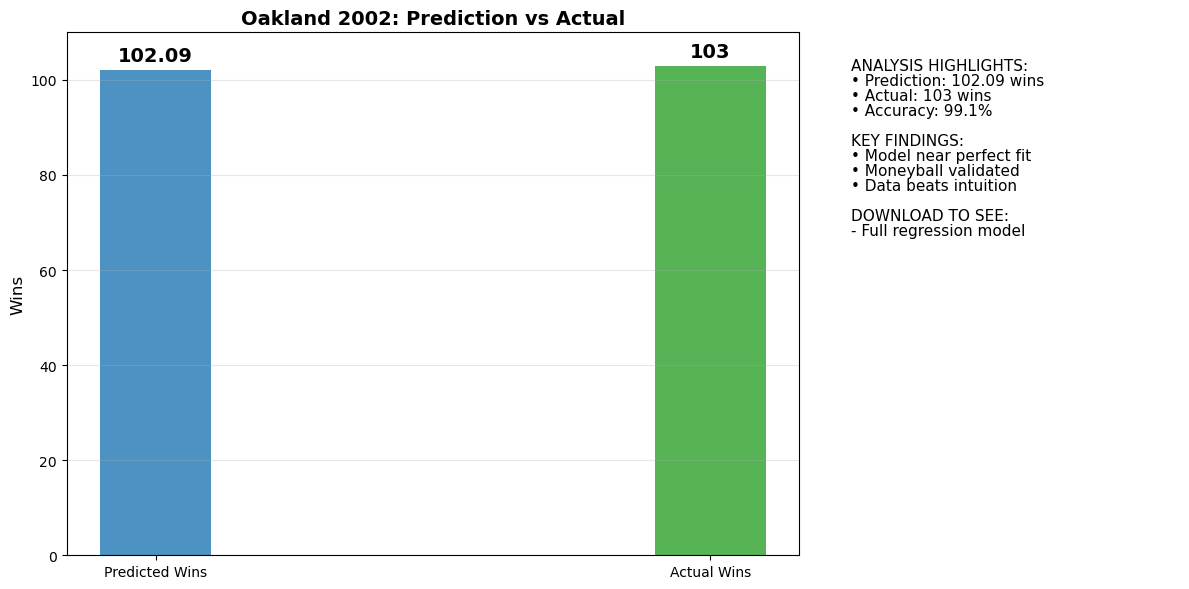

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure with two sections
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

# Left side: Chart with very thin bars close together
categories = ['Predicted Wins', 'Actual Wins']
values = [102.09, 103]

# Use numpy array for x positions and make bars very thin and close
x = np.arange(len(categories))
bars = ax1.bar(x, values, color=['#1f77b4', '#2ca02c'], alpha=0.8, width=0.2)  # Very thin bars

ax1.set_ylabel('Wins', fontsize=12)
ax1.set_title('Oakland 2002: Prediction vs Actual', fontsize=14, fontweight='bold')

# Set x-ticks to category names
ax1.set_xticks(x)
ax1.set_xticklabels(categories)

# Add values on top of bars
for bar, value in zip(bars, values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{value}', ha='center', va='bottom', fontweight='bold', fontsize=14)

ax1.set_ylim(0, 110)
ax1.grid(axis='y', alpha=0.3)

# Right side: Text 
ax2.axis('off')

text_content = [
    "ANALYSIS HIGHLIGHTS:\n",
    "• Prediction: 102.09 wins\n",
    "• Actual: 103 wins\n", 
    "• Accuracy: 99.1%\n",
    "\nKEY FINDINGS:\n",
    "• Model near perfect fit\n",
    "• Moneyball validated\n",
    "• Data beats intuition\n",
    "\nDOWNLOAD TO SEE:\n",
    "- Full regression model\n"
]

ax2.text(0.1, 0.95, ''.join(text_content), 
         transform=ax2.transAxes, fontsize=11, 
         verticalalignment='top', linespacing=1.0)

plt.tight_layout()
plt.savefig('moneyball_analysis.png', dpi=300, bbox_inches='tight')
plt.show()